In [1]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Download the data

In [2]:
data='https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv'
!wget -O CreditScoring.csv $data
df = pd.read_csv('CreditScoring.csv')
df.head()

--2025-11-26 06:20:46--  https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.1s    

2025-11-26 06:20:47 (1.31 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


# Some data manipulations

In [3]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [5]:
statues_values={
    1: 'ok',
    2: 'bad',
    0: 'unknow'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}

df['status'] = df['status'].map(statues_values)
df['home'] = df['home'].map(home_values)
df['marital'] = df['marital'].map(marital_values)
df['records'] = df['records'].map(records_values)
df['job'] = df['job'].map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,bad,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [6]:
df.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


In [7]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(99999999, np.nan)
df.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4421.00,4408.00,4437.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,130.57,5403.43,342.95,1039.02,1462.88
std,8.17,14.66,10.98,19.52,86.37,11573.16,1245.86,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3000.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,165.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,959.00,300000.00,30000.00,5000.00,11140.00


In [8]:
df = df[df.status != 'unknow'].reset_index(drop=True)
df.status.value_counts()

status
ok     3200
bad    1254
Name: count, dtype: int64

# Eliminate unbalance on the target value

In [9]:
# Separate majority and minority classes
df_ok = df[df['status'] == 'ok']
df_bad = df[df['status'] == 'bad']

df_ok_downsampled = df_ok.sample(n=1254, random_state=42)
df_balanced = pd.concat([df_ok_downsampled, df_bad]).sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.status.value_counts()
df_balanced.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,bad,0,rent,60,36,married,no,others,47,121.0,0.0,0.0,900,1423
1,ok,15,owner,60,50,widow,no,fixed,45,156.0,9800.0,0.0,700,1136
2,bad,3,owner,48,21,single,no,fixed,35,466.0,6000.0,0.0,2700,3100
3,bad,0,other,60,25,married,no,partime,60,60.0,0.0,0.0,1300,1380
4,bad,4,parents,48,25,single,no,fixed,35,73.0,0.0,0.0,700,814


# Split the data set

In [10]:
from sklearn.model_selection import train_test_split

df_fulltrain, df_test = train_test_split(df_balanced, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_fulltrain, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True) 
df_test = df_test.reset_index(drop=True)


Check the status of the loan.

In [11]:
df_train.status.value_counts()

status
ok     771
bad    733
Name: count, dtype: int64

The status with bad means the loan what not accepted.

The status with ok is accepted.

The code tranforme the bad values to 1 and ok to 0

In [12]:
(df_train.status=='bad').astype(int) 

0       0
1       1
2       1
3       0
4       0
       ..
1499    1
1500    0
1501    0
1502    0
1503    0
Name: status, Length: 1504, dtype: int64

In [13]:
y_train = (df_train.status=='bad').astype(int)
y_val = (df_val.status=='bad').astype(int)
y_test = (df_test.status=='bad').astype(int)

del df_train['status']
del df_val['status']
del df_test['status']

In [14]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,private,36,20,married,no,fixed,45,50.0,1500.0,100.0,1000,1387
1,2,rent,60,32,married,yes,freelance,60,NaN,0.0,0.0,1100,1480
2,1,parents,36,22,single,no,fixed,35,80.0,8000.0,0.0,490,690
3,15,owner,60,43,married,no,freelance,60,310.0,7000.0,0.0,1200,1297
4,3,owner,48,26,single,no,fixed,35,157.0,7000.0,0.0,1200,2053


In [15]:
numerical=['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']
categorical=['home', 'marital', 'records', 'job'] 


In [16]:
df_train.isna().sum()
for n in numerical:
    df_train[n].fillna(0, inplace=True)
df_train.isna().sum()

/tmp/ipykernel_6259/1903115827.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[n].fillna(0, inplace=True)


seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

# Vectorisation

In [17]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Training

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_train_pred = model.predict_proba(X_train)[:, 1]
roc= roc_auc_score(y_train, y_train_pred)
print("Training roc_auc:", roc)

Training roc_auc: 0.7837255349531004


In [19]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val_pred = model.predict_proba(X_val)[:, 1]
roc= roc_auc_score(y_val, y_val_pred)
print("Validation roc_auc:", roc)

Validation roc_auc: 0.7676155332981902


Explore the tree root deeph

In [20]:
from sklearn.tree import export_text
r = export_text(model, feature_names=dv.get_feature_names_out().tolist())
print(r)

|--- seniority <= 3.50
|   |--- records=no <= 0.50
|   |   |--- assets <= 8500.00
|   |   |   |--- class: 1
|   |   |--- assets >  8500.00
|   |   |   |--- class: 1
|   |--- records=no >  0.50
|   |   |--- job=fixed <= 0.50
|   |   |   |--- class: 1
|   |   |--- job=fixed >  0.50
|   |   |   |--- class: 0
|--- seniority >  3.50
|   |--- income <= 89.50
|   |   |--- assets <= 3800.00
|   |   |   |--- class: 1
|   |   |--- assets >  3800.00
|   |   |   |--- class: 0
|   |--- income >  89.50
|   |   |--- records=yes <= 0.50
|   |   |   |--- class: 0
|   |   |--- records=yes >  0.50
|   |   |   |--- class: 1



## Decision trees parameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [4, 5, 6, 7, 10, 15, 20, None],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20, 100, 200, 500]
}

# Create the model
dt = DecisionTreeClassifier(random_state=1)

# Use GridSearchCV with AUC as the scoring metric
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',  # Uses AUC for evaluation
    cv=5,  # 5-fold cross-validation (optional, adjust as needed)
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Get results
print("Best parameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)

# Convert results to DataFrame (similar to your df_scores)
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score']]
results_df.columns = ['max_depth', 'min_samples_leaf', 'auc']
results_df.sort_values(by='auc', ascending=False).head()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best parameters: {'max_depth': 6, 'min_samples_leaf': 20}
Best AUC score: 0.7941193308331476


,max_depth,min_samples_leaf,auc
23,6,20,0.794119
32,7,20,0.791606
41,10,20,0.790056
50,15,20,0.790056
68,None,20,0.790056


Final decisiontree model

In [22]:
dt= DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, criterion='gini')
dt.fit(X_train, y_train)
y_train_pred = dt.predict_proba(X_train)[:, 1]
roc= roc_auc_score(y_train, y_train_pred)
print("Training roc_auc:", roc)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val_pred = dt.predict_proba(X_val)[:, 1]
roc= roc_auc_score(y_val, y_val_pred)
print("Validation roc_auc:", roc)

test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)
y_test_pred = dt.predict_proba(X_test)[:, 1]
roc= roc_auc_score(y_test, y_test_pred)
print("Test roc_auc:", roc)

Training roc_auc: 0.8658038761870889
Validation roc_auc: 0.7753789875561092
Test roc_auc: 0.8010793650793651


## RandomForest

Mixing multiple decision tree trained with alternative features and deliver independente result.

The differentes result of the tree are agregaged.


In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': range(10, 201, 10),
    'min_samples_leaf': [1, 3, 5, 10, 50]
}

# Create the model
rf = RandomForestClassifier(random_state=1)

# GridSearchCV with AUC scoring
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # or use a single train/val split
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
df_scores = results_df[['param_max_depth', 'param_n_estimators', 
                         'param_min_samples_leaf', 'mean_test_score']]
df_scores.columns = ['max_depth', 'n_estimators', 'min_samples_leaf', 'auc']
df_scores = df_scores.sort_values('auc', ascending=False)

# View top results
print(df_scores.head(5))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=30; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, 

In [24]:
rf = RandomForestClassifier(max_depth=10, n_estimators=190, min_samples_leaf=5)
rf.fit(X_train, y_train)
y_train_pred = rf.predict_proba(X_train)[:, 1]
roc= roc_auc_score(y_train, y_train_pred)
print("Training roc_auc:", roc)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val_pred = rf.predict_proba(X_val)[:, 1]
roc= roc_auc_score(y_val, y_val_pred)
print("Validation roc_auc:", roc)

test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)
y_test_pred = rf.predict_proba(X_test)[:, 1]
roc= roc_auc_score(y_test, y_test_pred)
print("Test roc_auc:", roc)

Training roc_auc: 0.9422155100567466
Validation roc_auc: 0.8292040063257775
Test roc_auc: 0.851857142857143


## Trees Boosting XGBoost

In [25]:
#!pip install xgboost

In [26]:
import xgboost as xgb

In [27]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [28]:

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc'
}

model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=50,
    verbose_eval=5
)

[0]	train-auc:0.78192	val-auc:0.76451
[5]	train-auc:0.82430	val-auc:0.79375
[10]	train-auc:0.84497	val-auc:0.80414
[15]	train-auc:0.85903	val-auc:0.81471
[20]	train-auc:0.86732	val-auc:0.82256
[25]	train-auc:0.87535	val-auc:0.82626
[30]	train-auc:0.88178	val-auc:0.83075
[35]	train-auc:0.88444	val-auc:0.83340
[40]	train-auc:0.88820	val-auc:0.83450
[45]	train-auc:0.89149	val-auc:0.83730
[50]	train-auc:0.89472	val-auc:0.83916
[55]	train-auc:0.89737	val-auc:0.83955
[60]	train-auc:0.89922	val-auc:0.83968
[65]	train-auc:0.90144	val-auc:0.84011
[70]	train-auc:0.90353	val-auc:0.84055
[75]	train-auc:0.90537	val-auc:0.84108
[80]	train-auc:0.90680	val-auc:0.83962
[85]	train-auc:0.90758	val-auc:0.83979
[90]	train-auc:0.90930	val-auc:0.83847
[95]	train-auc:0.91089	val-auc:0.83711
[100]	train-auc:0.91245	val-auc:0.83737
[105]	train-auc:0.91393	val-auc:0.83700
[110]	train-auc:0.91484	val-auc:0.83706
[115]	train-auc:0.91655	val-auc:0.83687
[120]	train-auc:0.91730	val-auc:0.83647
[122]	train-auc:0.9177

[0]	train-auc:0.78192	val-auc:0.76451
[5]	train-auc:0.82430	val-auc:0.79375
[10]	train-auc:0.84497	val-auc:0.80414
[15]	train-auc:0.85903	val-auc:0.81471
[20]	train-auc:0.86732	val-auc:0.82256
[25]	train-auc:0.87535	val-auc:0.82626
[30]	train-auc:0.88178	val-auc:0.83075
[35]	train-auc:0.88444	val-auc:0.83340
[40]	train-auc:0.88820	val-auc:0.83450
[45]	train-auc:0.89149	val-auc:0.83730
[50]	train-auc:0.89472	val-auc:0.83916
[55]	train-auc:0.89737	val-auc:0.83955
[60]	train-auc:0.89922	val-auc:0.83968
[65]	train-auc:0.90144	val-auc:0.84011
[70]	train-auc:0.90353	val-auc:0.84055
[75]	train-auc:0.90537	val-auc:0.84108
[80]	train-auc:0.90680	val-auc:0.83962
[85]	train-auc:0.90758	val-auc:0.83979
[90]	train-auc:0.90930	val-auc:0.83847
[95]	train-auc:0.91089	val-auc:0.83711
[100]	train-auc:0.91245	val-auc:0.83737
[105]	train-auc:0.91393	val-auc:0.83700
[110]	train-auc:0.91484	val-auc:0.83706
[115]	train-auc:0.91655	val-auc:0.83687
[120]	train-auc:0.91730	val-auc:0.83647
[125]	train-auc:0.9187

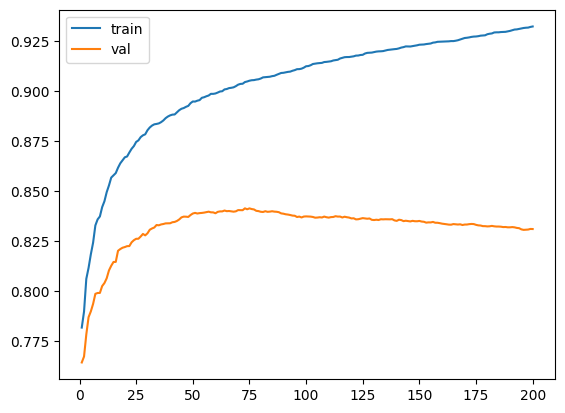

In [29]:
import matplotlib.pyplot as plt

evals_result = {}

model = xgb.train(params=xgb_params,
                  dtrain=dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=[(dtrain, 'train'), (dval, 'val')],
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

## Auto mate the hyperparameters tuning of XGBoost using Bayesian optimization on OPTUNA

In [30]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 26.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [optuna]2m5/6 [optuna]]my]


In [38]:
from optuna._imports import _INTEGRATION_IMPORT_ERROR_TEMPLATE


try:
    from optuna_integration.xgboost import XGBoostPruningCallback
except ModuleNotFoundError:
    raise ModuleNotFoundError(_INTEGRATION_IMPORT_ERROR_TEMPLATE.format("xgboost"))


__all__ = ["XGBoostPruningCallback"]

In [37]:
!pip install optuna-integration[xgboost]

In [50]:
import optuna
from optuna.integration import XGBoostPruningCallback

def objective(trial, dtrain=dtrain, dval=dval):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 10.0, log=True)
    }

    pruning_callback = XGBoostPruningCallback(trial, "val-auc")

    bst = xgb.train(
        param,
        dtrain,
        num_boost_round=1000,
        evals=[(dval, 'val')],
        early_stopping_rounds=50,
        callbacks=[pruning_callback]
    )

    preds = bst.predict(dval)
    auc = roc_auc_score(y_val, preds)
    return auc
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best trial:")
trial = study.best_trial
print("  AUC: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-11-26 07:30:55,881] A new study created in memory with name: no-name-95f06c1b-ad1f-409c-84d4-3a3f993f682b


[0]	val-auc:0.72178
[1]	val-auc:0.80217
[2]	val-auc:0.81210
[3]	val-auc:0.81583
[4]	val-auc:0.81541
[5]	val-auc:0.81697
[6]	val-auc:0.81795
[7]	val-auc:0.81840
[8]	val-auc:0.82089
[9]	val-auc:0.82190
[10]	val-auc:0.82420
[11]	val-auc:0.82488
[12]	val-auc:0.82613
[13]	val-auc:0.82685
[14]	val-auc:0.82606
[15]	val-auc:0.82553
[16]	val-auc:0.82611
[17]	val-auc:0.82845
[18]	val-auc:0.82869
[19]	val-auc:0.83026
[20]	val-auc:0.83106
[21]	val-auc:0.83353
[22]	val-auc:0.83456
[23]	val-auc:0.83486
[24]	val-auc:0.83585
[25]	val-auc:0.83494
[26]	val-auc:0.83537
[27]	val-auc:0.83542
[28]	val-auc:0.83470
[29]	val-auc:0.83521
[30]	val-auc:0.83564
[31]	val-auc:0.83641
[32]	val-auc:0.83686
[33]	val-auc:0.83769
[34]	val-auc:0.83836
[35]	val-auc:0.83686
[36]	val-auc:0.83593
[37]	val-auc:0.83561
[38]	val-auc:0.83607
[39]	val-auc:0.83566
[40]	val-auc:0.83527
[41]	val-auc:0.83518
[42]	val-auc:0.83503
[43]	val-auc:0.83582
[44]	val-auc:0.83502
[45]	val-auc:0.83473
[46]	val-auc:0.83491
[47]	val-auc:0.83400
[4

[I 2025-11-26 07:30:56,061] Trial 0 finished with value: 0.83132857302599 and parameters: {'max_depth': 6, 'min_child_weight': 8, 'eta': 0.10118301910407573, 'subsample': 0.9870940076940523, 'colsample_bytree': 0.7247048105936833, 'lambda': 0.00046750774765923306, 'alpha': 0.12980449496527896}. Best is trial 0 with value: 0.83132857302599.


[0]	val-auc:0.76587
[1]	val-auc:0.79664
[2]	val-auc:0.80351
[3]	val-auc:0.81170
[4]	val-auc:0.81376
[5]	val-auc:0.81379
[6]	val-auc:0.81329
[7]	val-auc:0.81431
[8]	val-auc:0.81472
[9]	val-auc:0.81460
[10]	val-auc:0.81485
[11]	val-auc:0.81519
[12]	val-auc:0.81808
[13]	val-auc:0.81818
[14]	val-auc:0.81963
[15]	val-auc:0.82012
[16]	val-auc:0.82031
[17]	val-auc:0.82200
[18]	val-auc:0.82168
[19]	val-auc:0.82061
[20]	val-auc:0.82133
[21]	val-auc:0.82216
[22]	val-auc:0.82508
[23]	val-auc:0.82511
[24]	val-auc:0.82539
[25]	val-auc:0.82539
[26]	val-auc:0.82531
[27]	val-auc:0.82490
[28]	val-auc:0.82509
[29]	val-auc:0.82511
[30]	val-auc:0.82507
[31]	val-auc:0.82670
[32]	val-auc:0.82669
[33]	val-auc:0.82696
[34]	val-auc:0.82768
[35]	val-auc:0.82730
[36]	val-auc:0.82693
[37]	val-auc:0.82758
[38]	val-auc:0.82787
[39]	val-auc:0.82856
[40]	val-auc:0.82983
[41]	val-auc:0.83201
[42]	val-auc:0.83271
[43]	val-auc:0.83368
[44]	val-auc:0.83466
[45]	val-auc:0.83448
[46]	val-auc:0.83460
[47]	val-auc:0.83477
[4

[I 2025-11-26 07:30:56,749] Trial 1 finished with value: 0.8371591508122873 and parameters: {'max_depth': 15, 'min_child_weight': 10, 'eta': 0.03245495606331662, 'subsample': 0.5437140941247622, 'colsample_bytree': 0.946394818622174, 'lambda': 0.00012067574874679555, 'alpha': 5.680691495810691e-07}. Best is trial 1 with value: 0.8371591508122873.


[0]	val-auc:0.77206
[1]	val-auc:0.79447
[2]	val-auc:0.80434
[3]	val-auc:0.81114
[4]	val-auc:0.81186
[5]	val-auc:0.81166
[6]	val-auc:0.81510
[7]	val-auc:0.81645
[8]	val-auc:0.81917
[9]	val-auc:0.82067
[10]	val-auc:0.82355
[11]	val-auc:0.82577
[12]	val-auc:0.82644
[13]	val-auc:0.82694
[14]	val-auc:0.82965
[15]	val-auc:0.82925
[16]	val-auc:0.82868
[17]	val-auc:0.83095
[18]	val-auc:0.82999
[19]	val-auc:0.82952
[20]	val-auc:0.82894
[21]	val-auc:0.82923
[22]	val-auc:0.83063
[23]	val-auc:0.83181
[24]	val-auc:0.83170
[25]	val-auc:0.82818
[26]	val-auc:0.83082
[27]	val-auc:0.82922
[28]	val-auc:0.82981
[29]	val-auc:0.83029
[30]	val-auc:0.82892
[31]	val-auc:0.82741
[32]	val-auc:0.82718
[33]	val-auc:0.82689
[34]	val-auc:0.82671
[35]	val-auc:0.82710
[36]	val-auc:0.82916
[37]	val-auc:0.82888
[38]	val-auc:0.82858
[39]	val-auc:0.82714
[40]	val-auc:0.82678
[41]	val-auc:0.82567
[42]	val-auc:0.82457
[43]	val-auc:0.82551
[44]	val-auc:0.82531
[45]	val-auc:0.82526
[46]	val-auc:0.82542
[47]	val-auc:0.82654
[4

[I 2025-11-26 07:30:56,956] Trial 2 finished with value: 0.8211849650964042 and parameters: {'max_depth': 4, 'min_child_weight': 8, 'eta': 0.24749214556501317, 'subsample': 0.7919920762844199, 'colsample_bytree': 0.8212828918646302, 'lambda': 0.0019435336216802456, 'alpha': 1.4954310381996993e-06}. Best is trial 1 with value: 0.8371591508122873.


[0]	val-auc:0.77985
[1]	val-auc:0.79194
[2]	val-auc:0.80079
[3]	val-auc:0.80324
[4]	val-auc:0.81028
[5]	val-auc:0.81400
[6]	val-auc:0.81164
[7]	val-auc:0.81391
[8]	val-auc:0.81282
[9]	val-auc:0.81728
[10]	val-auc:0.81696
[11]	val-auc:0.81537
[12]	val-auc:0.81812
[13]	val-auc:0.81865
[14]	val-auc:0.81930
[15]	val-auc:0.81820
[16]	val-auc:0.81997
[17]	val-auc:0.82085
[18]	val-auc:0.82163
[19]	val-auc:0.82249
[20]	val-auc:0.82323
[21]	val-auc:0.82398
[22]	val-auc:0.82369
[23]	val-auc:0.82467
[24]	val-auc:0.82224
[25]	val-auc:0.82259
[26]	val-auc:0.82189
[27]	val-auc:0.82157
[28]	val-auc:0.82189
[29]	val-auc:0.82090
[30]	val-auc:0.82171
[31]	val-auc:0.82040
[32]	val-auc:0.81877
[33]	val-auc:0.81888
[34]	val-auc:0.81874
[35]	val-auc:0.82047
[36]	val-auc:0.82155
[37]	val-auc:0.82007
[38]	val-auc:0.82043
[39]	val-auc:0.81972
[40]	val-auc:0.81922
[41]	val-auc:0.82019
[42]	val-auc:0.82080
[43]	val-auc:0.82141
[44]	val-auc:0.82063
[45]	val-auc:0.82067
[46]	val-auc:0.82090
[47]	val-auc:0.82165
[4

[I 2025-11-26 07:30:57,155] Trial 3 finished with value: 0.8175747991246147 and parameters: {'max_depth': 14, 'min_child_weight': 8, 'eta': 0.28911658308016575, 'subsample': 0.9848462040884011, 'colsample_bytree': 0.855708051083074, 'lambda': 0.02275927848168924, 'alpha': 2.2334979025372074e-05}. Best is trial 1 with value: 0.8371591508122873.


[0]	val-auc:0.74212
[1]	val-auc:0.81027
[2]	val-auc:0.81713
[3]	val-auc:0.81701
[4]	val-auc:0.82459
[5]	val-auc:0.82849
[6]	val-auc:0.83171
[7]	val-auc:0.83370
[8]	val-auc:0.83352
[9]	val-auc:0.83182
[10]	val-auc:0.82988
[11]	val-auc:0.82987
[12]	val-auc:0.82850
[13]	val-auc:0.82967
[14]	val-auc:0.83002
[15]	val-auc:0.83000
[16]	val-auc:0.82984
[17]	val-auc:0.82913
[18]	val-auc:0.82760
[19]	val-auc:0.82920
[20]	val-auc:0.83322
[21]	val-auc:0.83250
[22]	val-auc:0.83493
[23]	val-auc:0.83392
[24]	val-auc:0.83450
[25]	val-auc:0.83401
[26]	val-auc:0.83609
[27]	val-auc:0.83579
[28]	val-auc:0.83457
[29]	val-auc:0.83329
[30]	val-auc:0.83422
[31]	val-auc:0.83416
[32]	val-auc:0.83337
[33]	val-auc:0.83305
[34]	val-auc:0.83395
[35]	val-auc:0.83210
[36]	val-auc:0.83210
[37]	val-auc:0.83115
[38]	val-auc:0.83190
[39]	val-auc:0.83297
[40]	val-auc:0.83243
[41]	val-auc:0.83285
[42]	val-auc:0.83483
[43]	val-auc:0.83535
[44]	val-auc:0.83472
[45]	val-auc:0.83531
[46]	val-auc:0.83337
[47]	val-auc:0.83379
[4

[I 2025-11-26 07:30:57,388] Trial 4 finished with value: 0.8289164709828918 and parameters: {'max_depth': 4, 'min_child_weight': 9, 'eta': 0.1818540495422206, 'subsample': 0.6127069508396679, 'colsample_bytree': 0.5405785108351129, 'lambda': 1.110511465681521, 'alpha': 7.755390991817008e-07}. Best is trial 1 with value: 0.8371591508122873.
[I 2025-11-26 07:30:57,391] Trial 5 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.77459


[I 2025-11-26 07:30:57,401] Trial 6 pruned. Trial was pruned at iteration 1.
[I 2025-11-26 07:30:57,405] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:57,409] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:57,414] Trial 9 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.76860


[I 2025-11-26 07:30:57,437] Trial 10 pruned. Trial was pruned at iteration 1.
[I 2025-11-26 07:30:57,454] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:57,472] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:57,490] Trial 13 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.77976
[1]	val-auc:0.80977
[2]	val-auc:0.81820
[3]	val-auc:0.81583
[4]	val-auc:0.82004
[5]	val-auc:0.82317
[6]	val-auc:0.82354
[7]	val-auc:0.82616
[8]	val-auc:0.82610
[9]	val-auc:0.82789
[10]	val-auc:0.82979
[11]	val-auc:0.83127
[12]	val-auc:0.83102
[13]	val-auc:0.83186
[14]	val-auc:0.83363
[15]	val-auc:0.83454
[16]	val-auc:0.83628
[17]	val-auc:0.83815
[18]	val-auc:0.83678
[19]	val-auc:0.83599
[20]	val-auc:0.83700
[21]	val-auc:0.83706
[22]	val-auc:0.83684
[23]	val-auc:0.83919
[24]	val-auc:0.83860
[25]	val-auc:0.83839
[26]	val-auc:0.83825
[27]	val-auc:0.83825
[28]	val-auc:0.83802
[29]	val-auc:0.83801
[30]	val-auc:0.83655
[31]	val-auc:0.83703
[32]	val-auc:0.83719
[33]	val-auc:0.83614
[34]	val-auc:0.83543
[35]	val-auc:0.83446
[36]	val-auc:0.83329
[37]	val-auc:0.83361
[38]	val-auc:0.83305
[39]	val-auc:0.83360
[40]	val-auc:0.83425
[41]	val-auc:0.83559
[42]	val-auc:0.83470
[43]	val-auc:0.83323
[44]	val-auc:0.83208
[45]	val-auc:0.83230
[46]	val-auc:0.83203
[47]	val-auc:0.83216
[4

[I 2025-11-26 07:30:57,952] Trial 14 finished with value: 0.8256257887254198 and parameters: {'max_depth': 7, 'min_child_weight': 5, 'eta': 0.12839681347751425, 'subsample': 0.7174708789274427, 'colsample_bytree': 0.9729621877053801, 'lambda': 1.5316668083206708e-07, 'alpha': 0.08234456776408662}. Best is trial 1 with value: 0.8371591508122873.
[I 2025-11-26 07:30:57,983] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,079] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,114] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,160] Trial 18 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.77718


[I 2025-11-26 07:30:58,206] Trial 19 pruned. Trial was pruned at iteration 1.
[I 2025-11-26 07:30:58,223] Trial 20 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,241] Trial 21 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,254] Trial 22 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,268] Trial 23 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,282] Trial 24 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,299] Trial 25 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.76954


[I 2025-11-26 07:30:58,313] Trial 26 pruned. Trial was pruned at iteration 1.
[I 2025-11-26 07:30:58,327] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,342] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,356] Trial 29 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,370] Trial 30 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.77035


[I 2025-11-26 07:30:58,387] Trial 31 pruned. Trial was pruned at iteration 1.


[0]	val-auc:0.78647
[1]	val-auc:0.80563
[2]	val-auc:0.81361


[I 2025-11-26 07:30:58,407] Trial 32 pruned. Trial was pruned at iteration 3.
[I 2025-11-26 07:30:58,423] Trial 33 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,441] Trial 34 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.78065


[I 2025-11-26 07:30:58,461] Trial 35 pruned. Trial was pruned at iteration 1.


[0]	val-auc:0.78147


[I 2025-11-26 07:30:58,485] Trial 36 pruned. Trial was pruned at iteration 1.


[0]	val-auc:0.77849


[I 2025-11-26 07:30:58,503] Trial 37 pruned. Trial was pruned at iteration 1.


[0]	val-auc:0.78394
[1]	val-auc:0.80165


[I 2025-11-26 07:30:58,529] Trial 38 pruned. Trial was pruned at iteration 2.
[I 2025-11-26 07:30:58,553] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,574] Trial 40 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,590] Trial 41 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,607] Trial 42 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.77301


[I 2025-11-26 07:30:58,632] Trial 43 pruned. Trial was pruned at iteration 1.
[I 2025-11-26 07:30:58,705] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,725] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,745] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2025-11-26 07:30:58,763] Trial 47 pruned. Trial was pruned at iteration 0.


[0]	val-auc:0.77901


[I 2025-11-26 07:30:58,781] Trial 48 pruned. Trial was pruned at iteration 1.


[0]	val-auc:0.76964
[1]	val-auc:0.80265


[I 2025-11-26 07:30:58,862] Trial 49 pruned. Trial was pruned at iteration 2.


Best trial:
  AUC: 0.8371591508122873
  Params: 
    max_depth: 15
    min_child_weight: 10
    eta: 0.03245495606331662
    subsample: 0.5437140941247622
    colsample_bytree: 0.946394818622174
    lambda: 0.00012067574874679555
    alpha: 5.680691495810691e-07


In [ ]:
import optuna
from optuna.integration import XGBoostPruningCallback

# ============================================================================
# METHOD 1: Optuna (Recommended - Most Efficient)
# ============================================================================

def objective(trial, dtrain, dval):
    """Optuna objective function for XGBoost hyperparameter optimization"""
    
    # Define hyperparameter search space
    params = {
        'eta': trial.suggest_float('eta', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'lambda': trial.suggest_float('lambda', 0.1, 10, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 10, log=True),
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }
    
    # Train with early stopping
    pruning_callback = XGBoostPruningCallback(trial, 'val-auc')
    
    evals_result = {}
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=500,
        evals=[(dtrain, 'train'), (dval, 'val')],
        early_stopping_rounds=50,
        verbose_eval=False,
        evals_result=evals_result,
        callbacks=[pruning_callback]
    )
    
    # Return the best validation AUC
    return model.best_score


def tune_with_optuna(dtrain, dval, n_trials=100):
    """
    Tune XGBoost hyperparameters using Optuna
    
    Args:
        dtrain: Training DMatrix
        dval: Validation DMatrix
        n_trials: Number of optimization trials
    
    Returns:
        best_params: Best hyperparameters found
        study: Optuna study object with optimization history
    """
    study = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(seed=1),
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
    )
    
    study.optimize(
        lambda trial: objective(trial, dtrain, dval),
        n_trials=n_trials,
        show_progress_bar=True
    )
    
    print(f"\n{'='*60}")
    print(f"Best AUC: {study.best_value:.4f}")
    print(f"{'='*60}")
    print("\nBest Hyperparameters:")
    for param, value in study.best_params.items():
        print(f"  {param}: {value}")
    
    # Add fixed parameters
    best_params = study.best_params.copy()
    best_params.update({
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    })
    
    return best_params, study

In [48]:
print("Starting Hyperparameter Tuning with Optuna...")

best_params, study = tune_with_optuna(dtrain, dval, n_trials=100)

# Train final model with best parameters
final_model = xgb.train(
    best_params,
    dtrain,
    num_boost_round=500,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=50,
    verbose_eval=10
)

# Visualize optimization history (optional)
try:
    import matplotlib.pyplot as plt
    from optuna.visualization import plot_optimization_history, plot_param_importances
    
    fig1 = plot_optimization_history(study)
    fig1.show()
    
    fig2 = plot_param_importances(study)
    fig2.show()
except ImportError:
    print("\nInstall optuna[visualization] to see optimization plots")


[I 2025-11-26 07:27:57,441] A new study created in memory with name: no-name-a7140424-ecd6-4123-930d-0f0871c38776


Starting Hyperparameter Tuning with Optuna...


Best trial: 0. Best value: 0.830706:   1%|          | 1/100 [00:00<00:27,  3.60it/s]

[I 2025-11-26 07:27:57,717] Trial 0 finished with value: 0.8307055797830706 and parameters: {'eta': 0.041303995700526265, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.7209330290527359, 'colsample_bytree': 0.6587023563268452, 'gamma': 0.461692973843989, 'lambda': 0.2357873072646738, 'alpha': 1.2883876209377052e-05}. Best is trial 0 with value: 0.8307055797830706.
[I 2025-11-26 07:27:57,919] Trial 1 finished with value: 0.8377981182409227 and parameters: {'eta': 0.03855437519010386, 'max_depth': 7, 'min_child_weight': 9, 'subsample': 0.8740878001587038, 'colsample_bytree': 0.6817808998926069, 'gamma': 4.390587181954727, 'lambda': 0.11344234265835235, 'alpha': 0.010819509974097813}. Best is trial 1 with value: 0.8377981182409227.


Best trial: 3. Best value: 0.839931:   4%|▍         | 4/100 [00:00<00:15,  6.37it/s]

[I 2025-11-26 07:27:58,062] Trial 2 finished with value: 0.8332774236833277 and parameters: {'eta': 0.04134374308918326, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.6792405956339516, 'colsample_bytree': 0.9202978274702147, 'gamma': 4.841307878596988, 'lambda': 0.4234950674068093, 'alpha': 0.017017804924595526}. Best is trial 1 with value: 0.8377981182409227.
[I 2025-11-26 07:27:58,166] Trial 3 finished with value: 0.8399306720339931 and parameters: {'eta': 0.19703031164113372, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.615621913293153, 'colsample_bytree': 0.6679321678258275, 'gamma': 4.390712517147065, 'lambda': 0.15728730372487212, 'alpha': 6.165504584878686e-05}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:27:58,240] Trial 4 finished with value: 0.8337326879762305 and parameters: {'eta': 0.2599674562373734, 'max_depth': 7, 'min_child_weight': 14, 'subsample': 0.7262062524024252, 'colsample_bytree': 0.8746003710726334, 'gamma': 4.173128359486

[I 2025-11-26 07:27:58,313] Trial 5 finished with value: 0.839259756233926 and parameters: {'eta': 0.28884691428482884, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.9157117313805954, 'colsample_bytree': 0.6412904026310567, 'gamma': 2.239467630879526, 'lambda': 6.564339077069614, 'alpha': 4.3906350030591474e-06}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:27:58,331] Trial 6 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:58,388] Trial 7 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:58,411] Trial 8 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:58,428] Trial 9 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:58,455] Trial 10 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:58,490] Trial 11 pruned. Trial was pruned at iteration 13.


Best trial: 3. Best value: 0.839931:  12%|█▏        | 12/100 [00:01<00:05, 16.13it/s]

[I 2025-11-26 07:27:58,515] Trial 12 pruned. Trial was pruned at iteration 10.


Best trial: 3. Best value: 0.839931:  15%|█▌        | 15/100 [00:01<00:05, 14.65it/s]

[I 2025-11-26 07:27:58,730] Trial 13 finished with value: 0.835162377597802 and parameters: {'eta': 0.15042291178750988, 'max_depth': 5, 'min_child_weight': 6, 'subsample': 0.8200213143685812, 'colsample_bytree': 0.7323547763549298, 'gamma': 0.9260928637484795, 'lambda': 0.2844567229770219, 'alpha': 0.0003755858272329087}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:27:58,765] Trial 14 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:58,793] Trial 15 pruned. Trial was pruned at iteration 10.


Best trial: 3. Best value: 0.839931:  20%|██        | 20/100 [00:01<00:05, 14.44it/s]

[I 2025-11-26 07:27:59,004] Trial 16 finished with value: 0.8393476142553633 and parameters: {'eta': 0.17807679123826275, 'max_depth': 10, 'min_child_weight': 11, 'subsample': 0.7538230343742891, 'colsample_bytree': 0.726293339752238, 'gamma': 3.1620879960462704, 'lambda': 0.814506833083475, 'alpha': 0.0010909664389715892}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:27:59,033] Trial 17 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,081] Trial 18 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,170] Trial 19 finished with value: 0.8347789971406208 and parameters: {'eta': 0.1904942096035305, 'max_depth': 10, 'min_child_weight': 16, 'subsample': 0.6495433895562089, 'colsample_bytree': 0.7007127917217817, 'gamma': 3.1426721330828413, 'lambda': 0.5642968007140634, 'alpha': 0.0013811759213218553}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:27:59,195] Trial 20 pruned. Trial was pruned at iteration 10.


Best trial: 3. Best value: 0.839931:  24%|██▍       | 24/100 [00:01<00:04, 15.73it/s]

[I 2025-11-26 07:27:59,294] Trial 21 finished with value: 0.8382054599766777 and parameters: {'eta': 0.20222152030739204, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.833265487336146, 'colsample_bytree': 0.6559426376770828, 'gamma': 2.8611820885055645, 'lambda': 4.041743416017246, 'alpha': 1.4017896517914807e-05}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:27:59,363] Trial 22 pruned. Trial was pruned at iteration 33.
[I 2025-11-26 07:27:59,398] Trial 23 pruned. Trial was pruned at iteration 13.


Best trial: 3. Best value: 0.839931:  30%|███       | 30/100 [00:02<00:03, 18.70it/s]

[I 2025-11-26 07:27:59,551] Trial 24 finished with value: 0.8393476142553633 and parameters: {'eta': 0.20393594095134973, 'max_depth': 8, 'min_child_weight': 8, 'subsample': 0.6362790694508894, 'colsample_bytree': 0.6742983581067562, 'gamma': 3.750181287358232, 'lambda': 0.16769691696649586, 'alpha': 1.2392795735394244e-08}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:27:59,577] Trial 25 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,604] Trial 26 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,636] Trial 27 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,670] Trial 28 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,702] Trial 29 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,727] Trial 30 pruned. Trial was pruned at iteration 10.


Best trial: 3. Best value: 0.839931:  36%|███▌      | 36/100 [00:02<00:02, 21.57it/s]

[I 2025-11-26 07:27:59,755] Trial 31 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,845] Trial 32 finished with value: 0.8368955767479753 and parameters: {'eta': 0.29874729643252446, 'max_depth': 8, 'min_child_weight': 9, 'subsample': 0.8474110716574164, 'colsample_bytree': 0.6076477545562519, 'gamma': 4.129657918787814, 'lambda': 1.4710157970872828, 'alpha': 2.604082746370634e-07}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:27:59,888] Trial 33 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:27:59,918] Trial 34 pruned. Trial was pruned at iteration 12.
[I 2025-11-26 07:27:59,950] Trial 35 pruned. Trial was pruned at iteration 10.


Best trial: 3. Best value: 0.839931:  39%|███▉      | 39/100 [00:02<00:02, 20.70it/s]

[I 2025-11-26 07:27:59,997] Trial 36 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,046] Trial 37 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,100] Trial 38 pruned. Trial was pruned at iteration 10.


Best trial: 40. Best value: 0.842095:  42%|████▏     | 42/100 [00:02<00:03, 15.96it/s]

[I 2025-11-26 07:28:00,235] Trial 39 finished with value: 0.838293317998115 and parameters: {'eta': 0.17837629042835562, 'max_depth': 9, 'min_child_weight': 13, 'subsample': 0.8861830991469861, 'colsample_bytree': 0.6768461843262072, 'gamma': 4.319427545833091, 'lambda': 1.399304225036642, 'alpha': 1.1363005408525423e-06}. Best is trial 3 with value: 0.8399306720339931.
[I 2025-11-26 07:28:00,362] Trial 40 finished with value: 0.8420951741984952 and parameters: {'eta': 0.24121727980926322, 'max_depth': 7, 'min_child_weight': 8, 'subsample': 0.6198357369494882, 'colsample_bytree': 0.6234100402652021, 'gamma': 1.9048042429249243, 'lambda': 2.658572890320401, 'alpha': 1.4904266801705936e-08}. Best is trial 40 with value: 0.8420951741984952.
[I 2025-11-26 07:28:00,389] Trial 41 pruned. Trial was pruned at iteration 10.


Best trial: 40. Best value: 0.842095:  48%|████▊     | 48/100 [00:03<00:02, 19.70it/s]

[I 2025-11-26 07:28:00,501] Trial 42 finished with value: 0.8403779492340377 and parameters: {'eta': 0.229533448890742, 'max_depth': 8, 'min_child_weight': 8, 'subsample': 0.6743634015836124, 'colsample_bytree': 0.6257873072234423, 'gamma': 1.5330970163362958, 'lambda': 5.532375333604158, 'alpha': 2.1626563028494534e-07}. Best is trial 40 with value: 0.8420951741984952.
[I 2025-11-26 07:28:00,534] Trial 43 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,574] Trial 44 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,603] Trial 45 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,628] Trial 46 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,654] Trial 47 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,684] Trial 48 pruned. Trial was pruned at iteration 10.


Best trial: 51. Best value: 0.843749:  51%|█████     | 51/100 [00:03<00:02, 21.71it/s]

[I 2025-11-26 07:28:00,714] Trial 49 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,758] Trial 50 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:00,891] Trial 51 finished with value: 0.8437485024200891 and parameters: {'eta': 0.22554101752006056, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.6010689744452404, 'colsample_bytree': 0.647983691628682, 'gamma': 3.332155018065267, 'lambda': 6.4362124778476835, 'alpha': 9.868075059923152e-05}. Best is trial 51 with value: 0.8437485024200891.


[I 2025-11-26 07:28:00,919] Trial 52 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,029] Trial 53 finished with value: 0.8387006597338701 and parameters: {'eta': 0.19138678897467531, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.6463089459140559, 'colsample_bytree': 0.6505221372939004, 'gamma': 3.3441883061039412, 'lambda': 4.746995215906476, 'alpha': 0.0006458415334834274}. Best is trial 51 with value: 0.8437485024200891.
[I 2025-11-26 07:28:01,064] Trial 54 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,092] Trial 55 pruned. Trial was pruned at iteration 10.


Best trial: 51. Best value: 0.843749:  60%|██████    | 60/100 [00:03<00:01, 20.67it/s]

[I 2025-11-26 07:28:01,120] Trial 56 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,146] Trial 57 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,175] Trial 58 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,203] Trial 59 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,235] Trial 60 pruned. Trial was pruned at iteration 10.


Best trial: 51. Best value: 0.843749:  66%|██████▌   | 66/100 [00:04<00:01, 21.47it/s]

[I 2025-11-26 07:28:01,340] Trial 61 finished with value: 0.8385568920624271 and parameters: {'eta': 0.29988915051867077, 'max_depth': 8, 'min_child_weight': 5, 'subsample': 0.7547293296883093, 'colsample_bytree': 0.61916682767456, 'gamma': 2.3184649734332727, 'lambda': 8.552902294263715, 'alpha': 1.8132594474518838e-05}. Best is trial 51 with value: 0.8437485024200891.
[I 2025-11-26 07:28:01,372] Trial 62 pruned. Trial was pruned at iteration 14.
[I 2025-11-26 07:28:01,407] Trial 63 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,464] Trial 64 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,494] Trial 65 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,522] Trial 66 pruned. Trial was pruned at iteration 10.


Best trial: 51. Best value: 0.843749:  72%|███████▏  | 72/100 [00:04<00:01, 22.46it/s]

[I 2025-11-26 07:28:01,560] Trial 67 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,587] Trial 68 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,617] Trial 69 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,685] Trial 70 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,748] Trial 71 pruned. Trial was pruned at iteration 10.


Best trial: 51. Best value: 0.843749:  76%|███████▌  | 76/100 [00:04<00:01, 23.51it/s]

[I 2025-11-26 07:28:01,777] Trial 72 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,815] Trial 73 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:01,846] Trial 74 pruned. Trial was pruned at iteration 13.
[I 2025-11-26 07:28:01,902] Trial 75 pruned. Trial was pruned at iteration 13.
[I 2025-11-26 07:28:01,938] Trial 76 pruned. Trial was pruned at iteration 10.


Best trial: 51. Best value: 0.843749:  80%|████████  | 80/100 [00:04<00:00, 22.32it/s]

[I 2025-11-26 07:28:02,028] Trial 77 finished with value: 0.838716633919586 and parameters: {'eta': 0.20684550438762403, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.6824762345183064, 'colsample_bytree': 0.6396769627369078, 'gamma': 1.9314145463543333, 'lambda': 5.8643346964653436, 'alpha': 0.00018967326683154374}. Best is trial 51 with value: 0.8437485024200891.
[I 2025-11-26 07:28:02,057] Trial 78 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,098] Trial 79 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,175] Trial 80 pruned. Trial was pruned at iteration 18.


Best trial: 51. Best value: 0.843749:  85%|████████▌ | 85/100 [00:04<00:00, 19.51it/s]

[I 2025-11-26 07:28:02,234] Trial 81 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,268] Trial 82 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,297] Trial 83 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,405] Trial 84 finished with value: 0.8372629830194406 and parameters: {'eta': 0.20297953895184853, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.7454609193207945, 'colsample_bytree': 0.6616346709645982, 'gamma': 2.3711557867915163, 'lambda': 3.808454242043141, 'alpha': 0.0009118639491668434}. Best is trial 51 with value: 0.8437485024200891.


Best trial: 51. Best value: 0.843749:  88%|████████▊ | 88/100 [00:05<00:00, 19.16it/s]

[I 2025-11-26 07:28:02,493] Trial 85 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,530] Trial 86 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,569] Trial 87 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,670] Trial 88 finished with value: 0.8413204261912749 and parameters: {'eta': 0.25727826923966796, 'max_depth': 9, 'min_child_weight': 6, 'subsample': 0.6399805965040826, 'colsample_bytree': 0.6406452030603496, 'gamma': 2.652165053826084, 'lambda': 6.563985292965251, 'alpha': 6.075837511229397e-08}. Best is trial 51 with value: 0.8437485024200891.


Best trial: 51. Best value: 0.843749:  90%|█████████ | 90/100 [00:05<00:00, 18.21it/s]

[I 2025-11-26 07:28:02,699] Trial 89 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:02,896] Trial 90 pruned. Trial was pruned at iteration 10.


Best trial: 51. Best value: 0.843749:  92%|█████████▏| 92/100 [00:05<00:00,  9.86it/s]

[I 2025-11-26 07:28:03,205] Trial 91 finished with value: 0.8408092522483667 and parameters: {'eta': 0.22118213058006042, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.6601914563434466, 'colsample_bytree': 0.6530086170268096, 'gamma': 2.17337232046527, 'lambda': 6.608180018210607, 'alpha': 1.6170124404335073e-08}. Best is trial 51 with value: 0.8437485024200891.
[I 2025-11-26 07:28:03,325] Trial 92 finished with value: 0.8394754077410904 and parameters: {'eta': 0.22255910410857127, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.6583513405278157, 'colsample_bytree': 0.6373822742028841, 'gamma': 2.2576463191751643, 'lambda': 6.2686521336849745, 'alpha': 6.859377405413479e-08}. Best is trial 51 with value: 0.8437485024200891.


Best trial: 51. Best value: 0.843749:  94%|█████████▍| 94/100 [00:06<00:00,  9.84it/s]

[I 2025-11-26 07:28:03,409] Trial 93 finished with value: 0.8422788773342279 and parameters: {'eta': 0.2259186931752678, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.6608621950809381, 'colsample_bytree': 0.6249810394015731, 'gamma': 2.36425567447756, 'lambda': 7.173046833259087, 'alpha': 1.790397478242371e-08}. Best is trial 51 with value: 0.8437485024200891.
[I 2025-11-26 07:28:03,530] Trial 94 finished with value: 0.8434769412629192 and parameters: {'eta': 0.22121751876977147, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6627129633299063, 'colsample_bytree': 0.671382163984202, 'gamma': 2.3664440987656215, 'lambda': 6.693266639618094, 'alpha': 1.5278192004672e-08}. Best is trial 51 with value: 0.8437485024200891.


Best trial: 51. Best value: 0.843749:  96%|█████████▌| 96/100 [00:06<00:00,  9.71it/s]

[I 2025-11-26 07:28:03,622] Trial 95 finished with value: 0.8418236130413252 and parameters: {'eta': 0.22473032907628457, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.659073659690342, 'colsample_bytree': 0.6320412287614547, 'gamma': 2.3212456845212883, 'lambda': 9.478545752606873, 'alpha': 1.706375817457012e-08}. Best is trial 51 with value: 0.8437485024200891.
[I 2025-11-26 07:28:03,726] Trial 96 finished with value: 0.84281401255571 and parameters: {'eta': 0.21774141361305652, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6588164855844961, 'colsample_bytree': 0.6250314524793539, 'gamma': 2.4013454010673456, 'lambda': 8.870601331026496, 'alpha': 1.7487190450710907e-08}. Best is trial 51 with value: 0.8437485024200891.


Best trial: 51. Best value: 0.843749: 100%|██████████| 100/100 [00:06<00:00, 14.93it/s]

[I 2025-11-26 07:28:04,024] Trial 97 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:04,108] Trial 98 pruned. Trial was pruned at iteration 10.
[I 2025-11-26 07:28:04,139] Trial 99 pruned. Trial was pruned at iteration 10.

Best AUC: 0.8437

Best Hyperparameters:
  eta: 0.22554101752006056
  max_depth: 8
  min_child_weight: 6
  subsample: 0.6010689744452404
  colsample_bytree: 0.647983691628682
  gamma: 3.332155018065267
  lambda: 6.4362124778476835
  alpha: 9.868075059923152e-05
[0]	train-auc:0.75768	val-auc:0.73172
[10]	train-auc:0.85967	val-auc:0.82880
[20]	train-auc:0.87878	val-auc:0.83977
[30]	train-auc:0.88472	val-auc:0.84128
[40]	train-auc:0.88859	val-auc:0.84186
[50]	train-auc:0.89034	val-auc:0.84241
[60]	train-auc:0.89161	val-auc:0.84375
[70]	train-auc:0.89202	val-auc:0.84217
[80]	train-auc:0.89217	val-auc:0.84167


[90]	train-auc:0.89254	val-auc:0.84161
[100]	train-auc:0.89316	val-auc:0.83975
[108]	train-auc:0.89459	val-auc:0.83952
